# Confusion matrix

### For the testing purposes we want to check how the model works and which classes get confused with each other

### imports

In [1]:
import sys

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

sys.path.append('../')
import utils


In [2]:
NUMBER_OF_CLASSES = 10

### Load data and the model

In [4]:
data = utils.get_data('../data/data.pkl')
X_valid = data['X_valid']
y_valid = data['y_valid']

model = utils.load_model('../models/model_1.h5')


### Evaluate predictions on the test set

In [6]:
predictions = np.argmax(model.predict(X_valid), axis = 1)


### Create a matrix

In [7]:
matrix = tf.math.confusion_matrix(y_valid, predictions, NUMBER_OF_CLASSES)


### Plot a heatmap

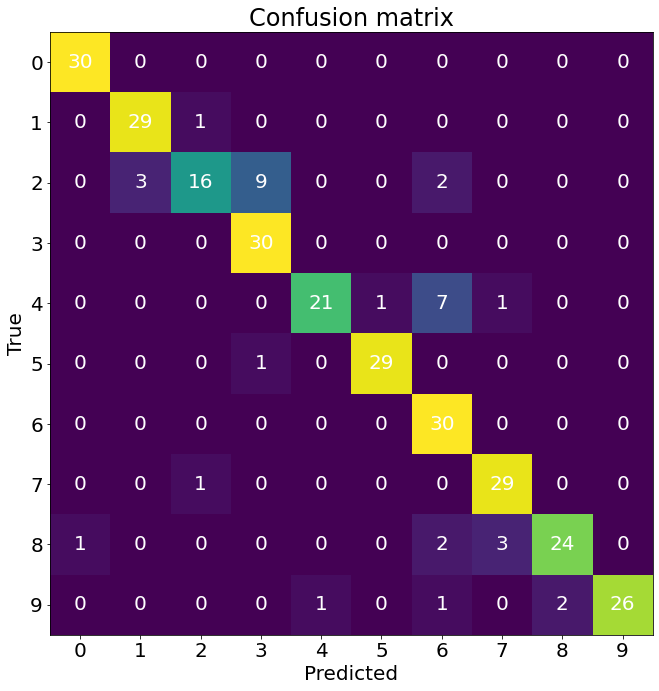

In [8]:
plt.rcParams["figure.figsize"] = (10, 10)
plt.rcParams['savefig.facecolor']='white'
plt.rcParams["font.size"] = 20
fig, ax = plt.subplots()
im = ax.imshow(matrix)

ax.set_xticks(np.arange(NUMBER_OF_CLASSES), labels=range(NUMBER_OF_CLASSES))
ax.set_yticks(np.arange(NUMBER_OF_CLASSES), labels=range(NUMBER_OF_CLASSES))

for i in range(NUMBER_OF_CLASSES):
    for j in range(NUMBER_OF_CLASSES):
        text = ax.text(j, i, int(matrix[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Confusion matrix")
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
fig.tight_layout()
